# multi-class classification of animals using tensorflow

In [3]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Image # view images
import datetime
import os

from sklearn.model_selection import train_test_split
from matplotlib.pyplot import imread  #read images as array of RGB values

1. Find filenames and path 

In [ ]:
# import os
# Path = 'path_of_root'
# dataframe = pd.DataFrame()

# for subfolder in os.listdir(Path):
#     files = os.listdir(Path + subfolder)
#     for file in files:
#         if os.path.isfile(os.path.join(Path + subfolder, file)):
#             file_path = os.path.join(animals_path + subfolder, file)
#             file_name = os.path.splitext(os.path.basename(file_path))
#             Path = os.path.splitext(os.path.basename(file_path))[0]
#             x = [[file_path, file_name, subfolder,Path]]
#             x=pd.DataFrame(x)
#             dataframe = pd.concat([dataframe, x])
# dataframe = dataframe.drop(columns=[3])
# dataframe = dataframe.set_axis(['path', 'filename', 'kind'], axis='columns')
#
# dataframe["filname"]= dataframe["filname"].str.slice(2,-2)
# dataframe
# #dataframe.to_csv("labels.csv")

In [4]:
data =pd.read_csv('labels.csv')
data.head()

path  \
0  animal_img/butterfly\e030b20928e90021d85a5854e...   
1  animal_img/butterfly\e030b20929e90021d85a5854e...   
2  animal_img/butterfly\e030b2092be90021d85a5854e...   
3  animal_img/butterfly\e030b2092ce90021d85a5854e...   
4  animal_img/butterfly\e030b2092de90021d85a5854e...   

                                            filename       kind  
0  e030b20928e90021d85a5854ee454296eb70e3c818b413...  butterfly  
1  e030b20929e90021d85a5854ee454296eb70e3c818b413...  butterfly  
2  e030b2092be90021d85a5854ee454296eb70e3c818b413...  butterfly  
3  e030b2092ce90021d85a5854ee454296eb70e3c818b413...  butterfly  
4  e030b2092de90021d85a5854ee454296eb70e3c818b413...  butterfly

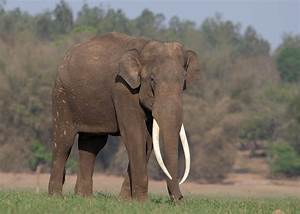

In [ ]:
total_images = 21358
Image(data["path"].iloc[15000])


get labels

In [ ]:
labels= np.array(data["kind"])
labels

array(['butterfly', 'butterfly', 'butterfly', ..., 'squirrel', 'squirrel',
       'squirrel'], dtype=object)

In [ ]:
un_labels= np.unique(labels)
un_labels

array(['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse',
       'sheep', 'squirrel'], dtype=object)

3. convert to numeric values

In [ ]:
mapping = {'butterfly': 0, 'cat': 1, 'chicken': 2, 'cow': 3, 'dog': 4, 'elephant': 5, 'horse': 6, 'sheep': 7, 'squirrel': 8}
key_map = {0:'butterfly', 1:'cat', 2:'chicken', 3:'cow', 4:'dog', 5:'elephant',6:'horse',7: 'sheep', 8:'squirrel'}
num_labels = np.vectorize(mapping.get)(labels)
type(num_labels)

numpy.ndarray

In [ ]:
X= data["path"]
y= num_labels
X

0        animal_img/butterfly\e030b20928e90021d85a5854e...
1        animal_img/butterfly\e030b20929e90021d85a5854e...
2        animal_img/butterfly\e030b2092be90021d85a5854e...
3        animal_img/butterfly\e030b2092ce90021d85a5854e...
4        animal_img/butterfly\e030b2092de90021d85a5854e...
                               ...                        
21353    animal_img/squirrel\OIP-_U7JiIoYjbWPqmmmmdsvJw...
21354    animal_img/squirrel\OIP-_VBkNQd_MZI4xoemUb-FtA...
21355    animal_img/squirrel\OIP-_WyHKgREia-4VijlL6DNsw...
21356    animal_img/squirrel\OIP-_xFGMN0UbYduHdiXQ1maZA...
21357    animal_img/squirrel\OIP-_XkUFCI2duAyKDD9utKQzg...
Name: path, Length: 21358, dtype: object

In [ ]:
y

array([0, 0, 0, ..., 8, 8, 8])

4. # Need to create a validation set to save time

In [ ]:
NUM_IMAGES= 1000 # @param {type:"slider",min:1000,max:10000,step:100} # in colab        ## to train for a subset of 1000
# capital variables generally mean hyper_parameters

total_samples = len(X)

# Generate random indices to select 1000 images
random_indices = np.random.choice(total_samples, NUM_IMAGES, replace=False)

# Select the corresponding image paths from X and labels from y
subset_X = X.iloc[random_indices]   
subset_y = y[random_indices]

def custom_train_test_split(X, y, test_size=0.2, random_state=None):
    # Split the data into training and testing subsets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    return X_train, X_test, y_train, y_test

# Usage
X_train, X_val, y_train, y_val = custom_train_test_split(subset_X, subset_y, test_size=0.2, random_state=42)
len(X_train),len(y_train),len(y_val),len(X_val)

(800, 800, 200, 200)

### TURN DATA INTO TENSORS

* funtion to do that
1. take filespaths as inputs
2. read files using tensorflow
3. turn into tensors and Normalize them
4. resize tensors in (224,224)
5. return images

In [ ]:
image = imread(data['path'][33])
image[:2],image.shape # h,w, color_channel   3-> RGB

(array([[[133,  88,  33],
         [133,  88,  33],
         [133,  88,  33],
         ...,
         [153, 104,  63],
         [153, 104,  63],
         [153, 104,  63]],
 
        [[133,  88,  33],
         [133,  88,  33],
         [133,  88,  33],
         ...,
         [153, 104,  63],
         [154, 105,  64],
         [153, 104,  63]]], dtype=uint8),
 (427, 640, 3))

In [ ]:
tf.constant(image)[:2]  # convert numerical data to tensor


<tf.Tensor: shape=(2, 640, 3), dtype=uint8, numpy=
array([[[133,  88,  33],
        [133,  88,  33],
        [133,  88,  33],
        ...,
        [153, 104,  63],
        [153, 104,  63],
        [153, 104,  63]],

       [[133,  88,  33],
        [133,  88,  33],
        [133,  88,  33],
        ...,
        [153, 104,  63],
        [154, 105,  64],
        [153, 104,  63]]], dtype=uint8)>

In [ ]:
IMG_SIZE=224

def process_img(Path,size=[IMG_SIZE,IMG_SIZE]):
    """convert image at some path to tensor"""
    img = tf.io.read_file(Path) #return a string representation of tensor object
    #turn into numeric with RGB values
    img= tf.image.decode_image(img,channels=3,expand_animations = False)  
    # if all images are same format use decode_png/jpeg instead as decode image doesnt return shape without using expand_animations = False
    #normalize i.e. convert from(0,255) to(0,1)
    img= tf.image.convert_image_dtype(img,tf.float32)  # convert_image_dtype scales values [0-1] if necessary
    #resize
    img= tf.image.resize(img,size) #resize
    return img

## tensorflow prefers data as batch (32 at a time) with tensors as data+label to be faster and not exhaust memory
<img src="batches.png">

In [ ]:
def tuple_tensor(X,y):
    """create tuple of image and label"""
    img=process_img(X)
    return (img,y)

tuple_tensor(X[12000],y[12000])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.12016807, 0.18224792, 0.00976891],
         [0.08413866, 0.14296219, 0.        ],
         [0.08781513, 0.14331234, 0.00332633],
         ...,
         [0.34936956, 0.25500658, 0.13165212],
         [0.3043759 , 0.16939627, 0.0399146 ],
         [0.2751751 , 0.10920878, 0.        ]],
 
        [[0.1119401 , 0.17196293, 0.00771191],
         [0.08666014, 0.14422293, 0.        ],
         [0.08856715, 0.14368835, 0.00542756],
         ...,
         [0.26644927, 0.17666474, 0.06321925],
         [0.3470874 , 0.21701814, 0.09014616],
         [0.34827587, 0.18974125, 0.06117911]],
 
        [[0.1031136 , 0.16042277, 0.00954132],
         [0.0881573 , 0.14347067, 0.00534081],
         [0.08795097, 0.14133857, 0.01422444],
         ...,
         [0.22068645, 0.13660003, 0.04384554],
         [0.4262908 , 0.30211315, 0.19039191],
         [0.434894  , 0.28749344, 0.16001928]],
 
        ...,
 
        [[0.40747848, 0.37610593

### create batches

In [ ]:
BATCH_SIZE =32
def d_batch(X,y=None,batch_size=BATCH_SIZE,valid_data=False,test_data=False):
    """
    Create batches of data from image(X),label(y)
    Shuffle training data
    Accepts test data as well   
    """
    #if test_data
    if test_data:
        print("testbatch")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))   # convert to dataset
        data_batch = data.map(process_img).batch(BATCH_SIZE)  # combine consecutive elements into batches
        return data_batch
    
    elif valid_data: #no shuffle needed
        print("validbatch") 
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))) 
        data_batch = data.map(tuple_tensor).batch(BATCH_SIZE) 
        return data_batch
    
    else: #need shuffle
        print("trainbatch")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))) 
        #shuffle paths
        data = data.shuffle(buffer_size=len(data))   # shuffle X values                   ### doesnt seem to be shuffling
        data = data.map(tuple_tensor)
        data_batch = data.batch(BATCH_SIZE) 
        return data_batch    

In [ ]:
train_data = d_batch(X_train, y_train)
val_data = d_batch(X_val, y_val,valid_data=True)

trainbatch
validbatch


In [ ]:
train_data.element_spec, val_data.element_spec # display components of data
# batch_size return none as it is flexible

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int32, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None,), dtype=tf.int32, name=None)))

In [ ]:
def show_batch(img,label):
    plt.figure(figsize=(10,10))
    for i in range(25):
        X=plt.subplot(5,5,i+1)
        
        plt.imshow(img[i])
        title = key_map.get(label[i], "Unknown")
        plt.title(title)
        plt.axis('off')

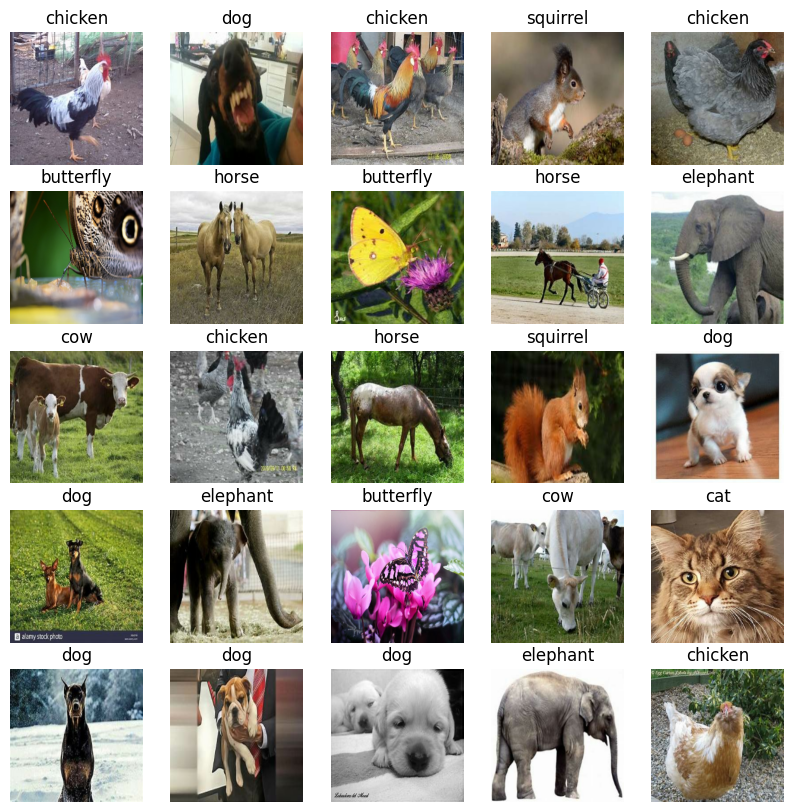

In [ ]:
t_img, t_y =next(train_data.as_numpy_iterator()) # convert to an iterable
show_batch(t_img,t_y)

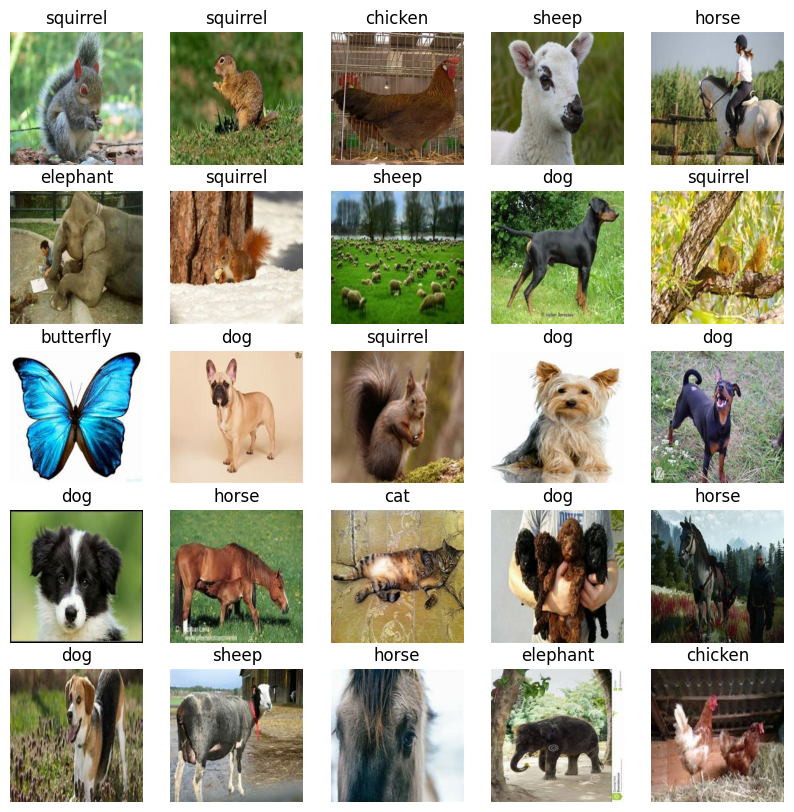

In [ ]:
v_img,v_y=next(val_data.as_numpy_iterator())
show_batch(v_img,v_y)

## build model using existing model (transfer learning) from tensorflowhub

* define inputs
* define outputs
* build model / load existing model
https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5

In [ ]:
INPUT_SHAPE = [None,IMG_SIZE,IMG_SIZE,3]  # (batch_size,height,width,color_channel)
OUTPUT_SHAPE = len(un_labels) 

MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_140_224/classification/5"

# MobileNet is TensorFlow’s first mobile computer vision model.

#### It uses depthwise separable convolutions
####  to significantly reduce the number of parameters
#### compared to other networks with regular convolutions and the same depth in the nets. 
#### This results in lightweight deep neural networks.

* to build and train we can use tf.keras api

In [ ]:
def create_model(input_shape=INPUT_SHAPE, output_shape=OUTPUT_SHAPE, model_url=MODEL_URL):
    """
    1.Takes input shape, OUTPUT_SHAPE, and MODEL_URL 
    2.defines layers of Neural Network
    3.compiles model
    4.builds model
    return model object
    "https://www.tensorflow.org/guide/keras/overview"
    """
    print("building model")
    model =tf.keras.Sequential([
        hub.KerasLayer(model_url), #input layer
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,   # default shape of this model is 1,1,1280 , we need to specify output_shape
                              activation="softmax") ])# layer 2 output layer          # softmax activation function is normalized exponential function that takes vector of size K and return  
    # probability distribution (K outputs) who are proportional to Exp(input)    normalized to (0,1) sum of output Ks =1    
    model.compile(
        loss=tf.keras.losses.sparse_categorical_crossentropy,    # minimize loss / error.  
        # since labels are integers and not OH encoded otherwise loss function is categorical_crossentropy
        
        optimizer=tf.keras.optimizers.Adam(),   #      adam() is generally fast for most applications
        metrics=["accuracy"]
    )
    model.build(input_shape)  #  
    return model
    

<img src="functions.png" height=200>

In [ ]:
model = create_model()
model.summary()

building model
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              6158505   
                                                                 
 dense (Dense)               (None, 9)                 9018      
                                                                 
Total params: 6,167,523
Trainable params: 9,018
Non-trainable params: 6,158,505
_________________________________________________________________


# non trainable refer to the parameters (patterns) that it was originally trained on. i.e. the original number of parameters

`layers in Image net model`

<img src="mobileNetV2Arch.png">

`each layer is a mini model`

# Create callbacks
`helper functions to check and save progress/ stop training if no longer improving`

In [ ]:
def tensorboard_callbacks():
    """This callback logs events for TensorBoard, including:
    Metrics summary plots
    Training graph visualization
    Weight histograms
    Sampled profiling
    """
    # Create directory to store logs
    dir=os.path.join("logs/", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(dir)


In [ ]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",patience=3)

# train on subset

In [ ]:
NUM_EPOCHS= 100  # number of epochs (passes) of data
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
def train_model(num_epochs=NUM_EPOCHS):
    """train model and return trained model."""
    model=create_model()
    tensorboard=tensorboard_callbacks()
    model.fit(x=train_data, epochs=num_epochs, validation_data=val_data, validation_freq=1,callbacks=[tensorboard,early_stop])
    return model

In [ ]:
#model = train_model()

building model
Epoch 1/100
25/25 [==============================] - 17s 258ms/step - loss: 1.5433 - accuracy: 0.5125 - val_loss: 0.5937 - val_accuracy: 0.8350
Epoch 2/100
25/25 [==============================] - 6s 211ms/step - loss: 0.3450 - accuracy: 0.9100 - val_loss: 0.2919 - val_accuracy: 0.9350
Epoch 3/100
25/25 [==============================] - 5s 208ms/step - loss: 0.1750 - accuracy: 0.9550 - val_loss: 0.2411 - val_accuracy: 0.9500
Epoch 4/100
25/25 [==============================] - 5s 206ms/step - loss: 0.1160 - accuracy: 0.9750 - val_loss: 0.2160 - val_accuracy: 0.9600
Epoch 5/100
25/25 [==============================] - 5s 208ms/step - loss: 0.0827 - accuracy: 0.9900 - val_loss: 0.2028 - val_accuracy: 0.9600
Epoch 6/100
25/25 [==============================] - 5s 209ms/step - loss: 0.0615 - accuracy: 0.9962 - val_loss: 0.1945 - val_accuracy: 0.9550
Epoch 7/100
25/25 [==============================] - 6s 208ms/step - loss: 0.0480 - accuracy: 0.9962 - val_loss: 0.1871 - val_

In [ ]:
%tensorboard --dir C:\Users\Haroon\Documents\VS-Code\py\TensorFlow_\logs

UsageError: Line magic function `%tensorboard` not found.


# predictions

In [ ]:
preds = model.predict(val_data, verbose =1)  # when predicting ignore actual labels, as val_data contains labels
preds   # probabilities for each label

7/7 [==============================] - 2s 151ms/step


array([[4.0377525e-04, 3.7847939e-03, 1.6616320e-02, ..., 1.4405248e-04,
        1.6864256e-03, 9.7477961e-01],
       [2.0601405e-03, 1.0598908e-02, 5.6370818e-03, ..., 1.7847515e-04,
        6.8512596e-03, 9.6420348e-01],
       [4.8816455e-06, 3.2003703e-05, 9.9684453e-01, ..., 1.0869931e-05,
        1.4953665e-03, 1.0594251e-03],
       ...,
       [7.7777719e-01, 1.4592657e-03, 5.4076307e-02, ..., 1.6812148e-02,
        6.7655798e-03, 8.8153249e-03],
       [1.2227622e-03, 9.9768877e-01, 5.2379266e-05, ..., 4.1559200e-05,
        5.4387343e-05, 1.1691046e-04],
       [5.1965006e-04, 1.0953824e-04, 9.9445277e-01, ..., 1.5428420e-03,
        2.5150619e-04, 1.3799604e-04]], dtype=float32)

In [ ]:
preds.shape, preds[0], key_map[np.argmax(preds[0])]

((200, 9),
 array([4.0377525e-04, 3.7847939e-03, 1.6616320e-02, 1.0255731e-03,
        7.0426834e-04, 8.5525372e-04, 1.4405248e-04, 1.6864256e-03,
        9.7477961e-01], dtype=float32),
 'squirrel')

(-0.5, 299.5, 224.5, -0.5)

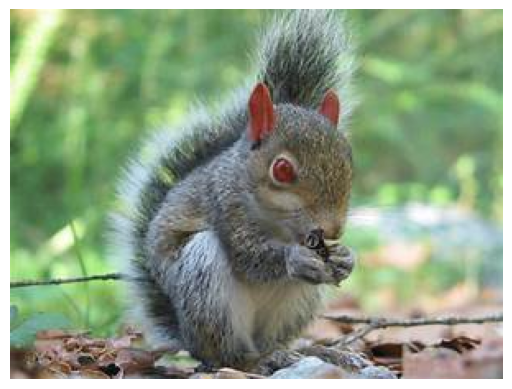

In [ ]:
plt.imshow(plt.imread(X_val.iloc[0]))
plt.axis('off')


In [ ]:
def pred_lab(pred_prob):
    """
    turn probability to label
    """
    return key_map[np.argmax(pred_prob)]

la = pred_lab(preds[5])

In [ ]:
def unbatch(bat):
    """
    unbatch dataset of (image, label) tensor
    return array of image array of label
    """
    img_ = []
    lab_ = []
    for img,lab in bat.unbatch().as_numpy_iterator():
        img_.append(img)
        lab_.append(lab)
    return img_,lab_

val_img,val_lab = unbatch(val_data)
val_img,val_lab
    

([array([[[0.6549735 , 0.67066705, 0.34125528],
          [0.7004461 , 0.7061623 , 0.38473377],
          [0.75873476, 0.74817055, 0.43778625],
          ...,
          [0.5674632 , 0.7076918 , 0.47905162],
          [0.5608063 , 0.7176601 , 0.48237047],
          [0.55756015, 0.7176719 , 0.48237774]],
  
         [[0.6556284 , 0.6746542 , 0.34526867],
          [0.6963277 , 0.70613164, 0.38471594],
          [0.7501696 , 0.74423945, 0.4404484 ],
          ...,
          [0.57936317, 0.71837366, 0.49027488],
          [0.5708199 , 0.7236129 , 0.49027488],
          [0.5720502 , 0.7288515 , 0.49353117]],
  
         [[0.65416807, 0.6857157 , 0.3602692 ],
          [0.68635726, 0.711873  , 0.39239168],
          [0.72831553, 0.741321  , 0.43099618],
          ...,
          [0.6036831 , 0.7380624 , 0.50221676],
          [0.6003509 , 0.74137306, 0.50220114],
          [0.5971228 , 0.74465156, 0.50544333]],
  
         ...,
  
         [[0.5473426 , 0.46248627, 0.41934156],
          [0.5

# VISUALIZATION

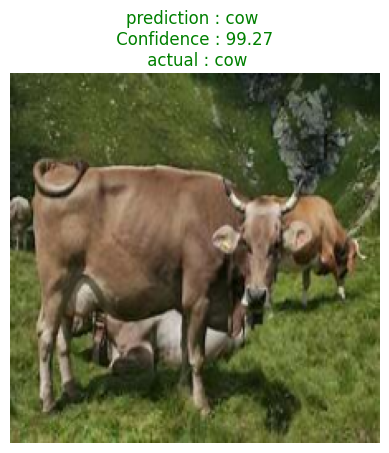

In [ ]:
def plot_pred(pre_prob,label,image,n=1):
    """
    view prediction, image, and actual label of nth index
    """
    prob,truth,img = pre_prob[n],label[n],image[n]
    p_label = pred_lab(prob)
    plt.imshow(img)
    plt.axis("off")
    if(p_label==key_map[truth]):
        color = "green"
    else: 
        color = "red"
    plt.title('prediction : {} \n Confidence : {:.2f} \n actual : {}'.format(p_label,
                                                                             np.max(prob)*100,
                                                                             key_map[truth]),
              color=color)
    
plot_pred(pre_prob=preds,label=val_lab,image=val_img,n=49)


In [ ]:
def pred_conf(pred_probs,labels,n=1):
    """return top 3 predicted probabilities"""
    p_p,tr_l=pred_probs[n],labels[n]
    pre_lab = pred_lab(p_p)
    top_index= p_p.argsort()[-3:][::-1]
    top_val =  p_p[top_index]
    top_lab = un_labels[top_index]
    top_plot = plt.bar(np.arange(len(top_lab))
                       ,top_val,
                       color='grey')
    plt.xticks(np.arange(len(top_lab)),
               labels=top_lab,
               rotation='vertical')
    if key_map[tr_l] in top_lab:
        top_plot[np.argmax(top_lab==key_map[tr_l])].set_color('green')
    else:
        pass

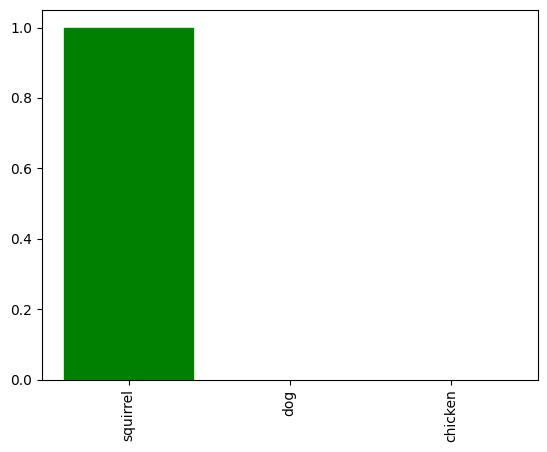

In [ ]:
pred_conf(preds,val_lab,n=9)

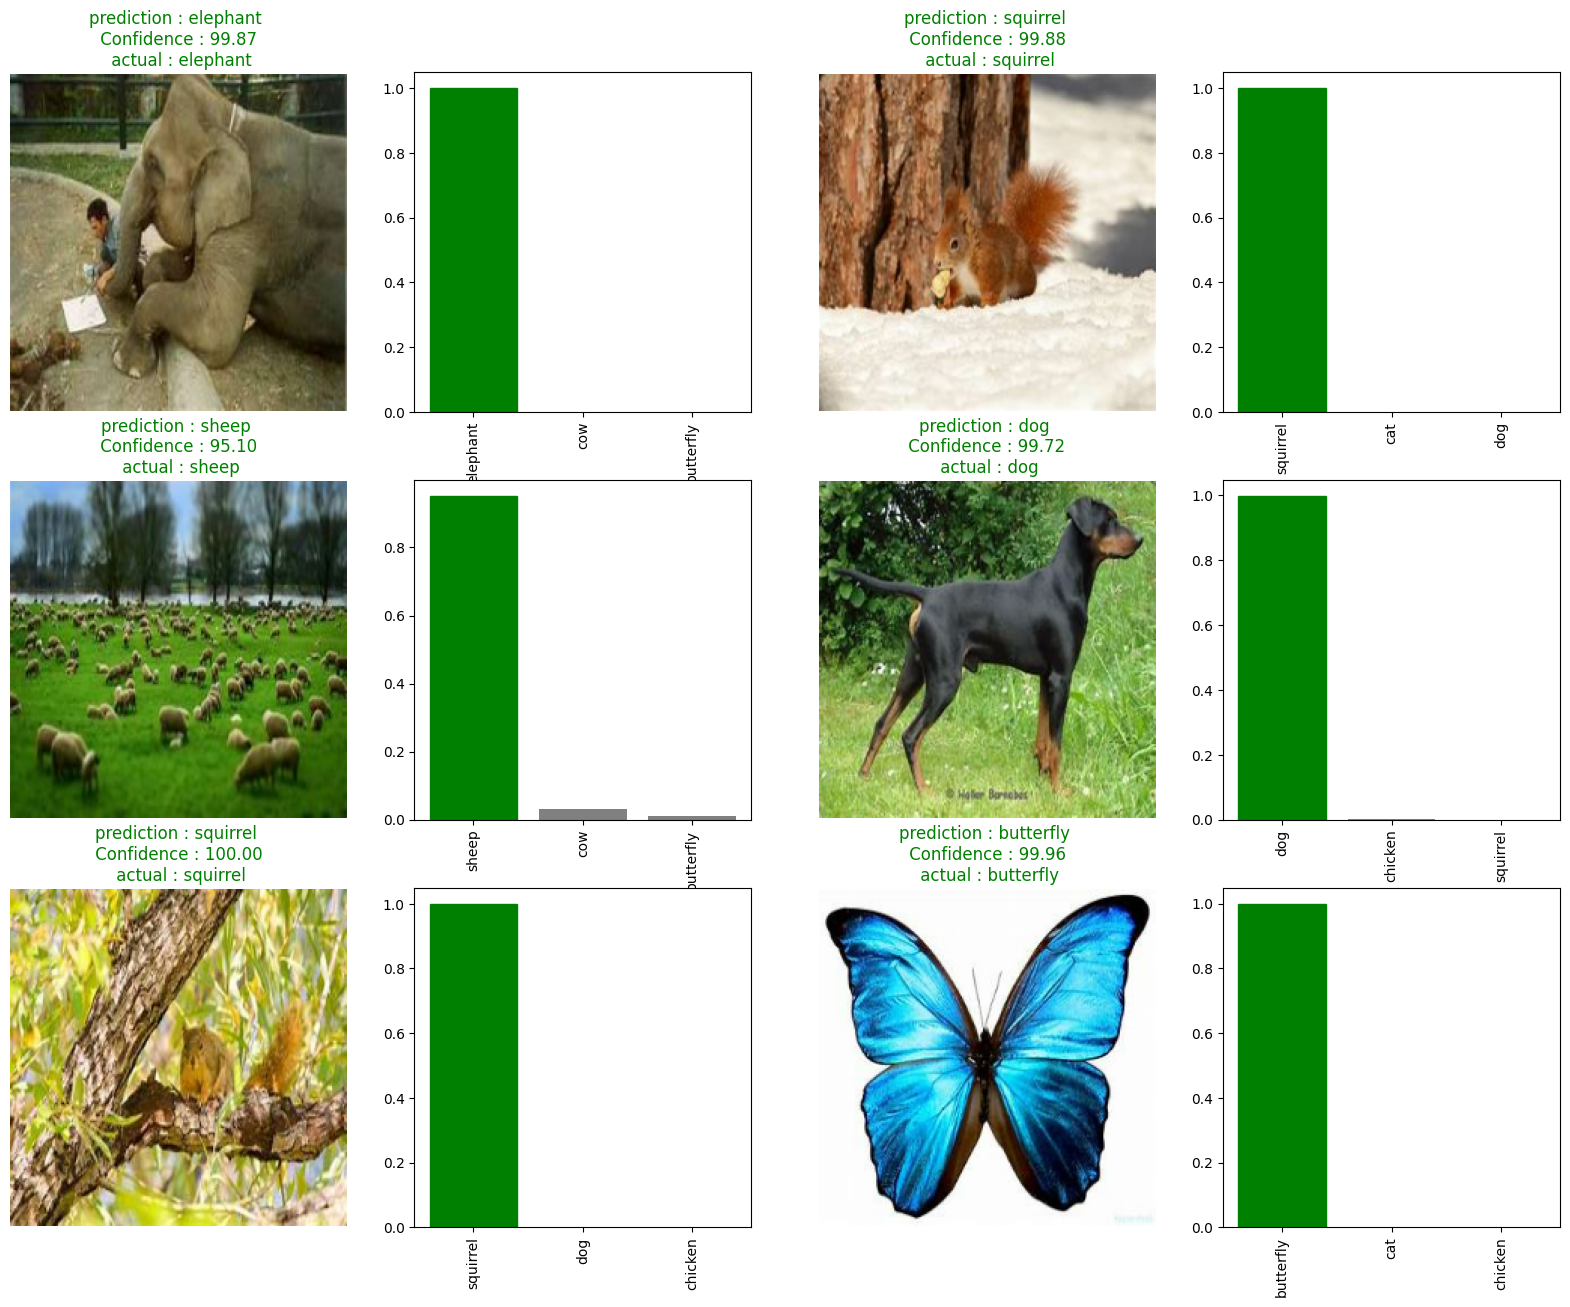

In [ ]:
i_mul,rows,cols = 5,3,2
num_img =rows*cols
plt.figure(figsize=(10*cols,5*rows))

for i in range(num_img):
    plt.subplot(rows, 2 * cols, 2 * i + 1)
    plot_pred(preds, val_lab, val_img, n=i + i_mul)
    
    plt.subplot(rows, 2 * cols, 2 * i + 2)  # Add this line
    pred_conf(preds, val_lab, n=i + i_mul)

plt.show()

<AxesSubplot:>

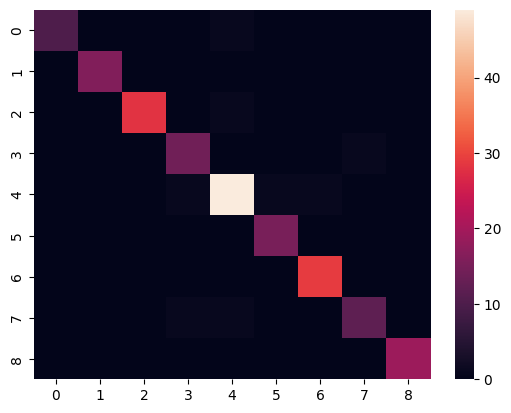

In [ ]:
import seaborn as sns
cfm = tf.math.confusion_matrix(
    val_lab,
    np.argmax(preds, axis=1),            # seperate labels
)

sns.heatmap(cfm)

# save and reload

In [ ]:
def save_model(model,suffix =None):
    """Save the model and append suffix"""
    dir= os.path.join("saved_models",datetime.datetime.now().strftime('%Y-%m-%d-%H-%M'))
    path =dir + "-" + ".h5"
    print("saving")
    model.save(path)  
    return(path)

def load_model(path):
    """return saved model from path"""
    print("loading")
    model = tf.keras.models.load_model(path,custom_objects={"KerasLayer":hub.KerasLayer})   # layers are custom
    return(model)    

In [ ]:
#save_model(model,suffix ="1000-images-mobilenetv2-Adam")
#_model =load_model('saved_models\\2023-09-03-17-25-.h5')
#l_model.summary

In [ ]:
#l_model.evaluate(val_data), model.evaluate(val_data)

# use full dataset

In [ ]:
full_data =d_batch(X,y)
full_data

trainbatch


<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
#full_model = create_model()

In [ ]:
full_tensorboard  = tensorboard_callbacks()
full_early_stop = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)

# `cell below will take time`

In [ ]:
#full_model.fit(x=full_data,epochs=NUM_EPOCHS,callbacks=[full_tensorboard,full_early_stop])

In [ ]:
full_l = load_model('saved_models\\2023-09-03-21-13-.h5')
full_l

loading


# test

# predictions on images

In [ ]:
tp = "test\\"
im_path = [tp + name for name in os.listdir(tp)]


In [ ]:
cd = d_batch(im_path,batch_size=6 ,test_data=True)
cd

testbatch


<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
pres= full_l.predict(cd)
pres

1/1 [==============================] - 1s 606ms/step


array([[5.79497145e-11, 2.20156185e-12, 7.38686185e-14, 1.11285981e-16,
        1.00000000e+00, 8.96158317e-16, 1.02019460e-14, 2.03201303e-10,
        3.01197869e-13],
       [7.11810622e-17, 1.36597795e-15, 1.80210925e-17, 1.75562469e-14,
        1.33499562e-13, 1.00000000e+00, 5.24312717e-14, 9.47230835e-12,
        1.78823012e-15],
       [4.32116626e-27, 7.92298665e-20, 8.31188270e-17, 6.26856856e-12,
        3.79921025e-11, 1.06113853e-28, 9.17590226e-20, 1.00000000e+00,
        4.24320369e-18],
       [8.41049841e-10, 8.50347996e-01, 1.91156357e-09, 3.19650832e-16,
        1.40487045e-01, 1.58193636e-09, 9.15457401e-03, 5.22187571e-11,
        1.03140992e-05],
       [2.81310190e-06, 9.96528447e-01, 3.54344089e-11, 1.54943604e-14,
        3.45087983e-03, 9.30194074e-06, 1.27741615e-07, 8.41597739e-06,
        7.56421503e-09],
       [1.17180002e-06, 9.99993801e-01, 1.17417095e-07, 2.15539231e-07,
        1.33820186e-06, 5.34237481e-11, 7.30384642e-11, 3.35007530e-06,
        9.6

In [ ]:
clab =  [pred_lab(pres[i]) for i in range(len(pres))]
clab


['dog', 'elephant', 'sheep', 'cat', 'cat', 'cat']

In [ ]:
imm =[]
for im in cd.unbatch().as_numpy_iterator():
    imm.append(im)

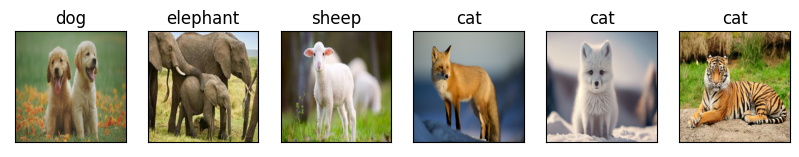

In [ ]:
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(1,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(clab[i])
    plt.imshow(imm[i])